# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

ASSET ALLOCATION AND PORTFOLIO ANALYSIS:

•	In this project, instead of analyzing individual stocks, I will use python to perform portfolio analysis such as calculating portfolio returns, risk and Sharpe ratio.
•	A portfolio is a collection of financial investments such as stocks, fixed income securities (bonds), cash, mutual funds and Exchange Traded Funds (ETFs).



# TASK #2: IMPORT LIBRARIES & DATASETS AND PERFORM DATA VISUALIZATION

In [18]:
import csv
import pandas as pd
import numpy as np
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [19]:
# Read the stock data file
stocks_df = pd.read_csv(r'C:\Users\iraku\OneDrive\Desktop\Data Analysis Project\stock_data.csv')
stocks_df

,Date,FB,TWTR,NFLX
0,2013-11-07,47.560001,44.900002,46.694286
1,2013-11-08,47.529999,41.650002,47.842857
2,2013-11-11,46.200001,42.900002,48.272858
3,2013-11-12,46.610001,41.900002,47.675713
4,2013-11-13,48.709999,42.599998,47.897144
...,...,...,...,...
1707,2020-08-20,269.010010,38.959999,497.899994
1708,2020-08-21,267.010010,39.259998,492.309998
1709,2020-08-24,271.390015,40.490002,488.809998
1710,2020-08-25,280.820007,40.549999,490.579987


In [22]:
# Function to plot interactive plot
def interactive_plot(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df["Date"], y = df[i], name = i)
    fig.show(renderer="png")

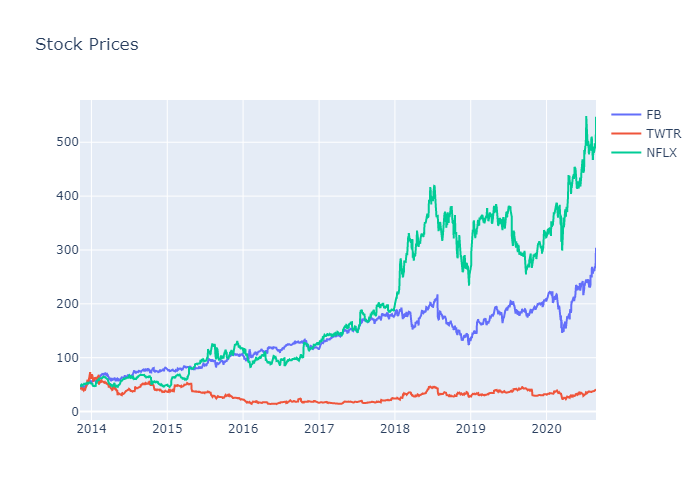

In [23]:
# Plot interactive chart
interactive_plot(stocks_df, 'Stock Prices')


In [24]:
def normalize(df):
    x  = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

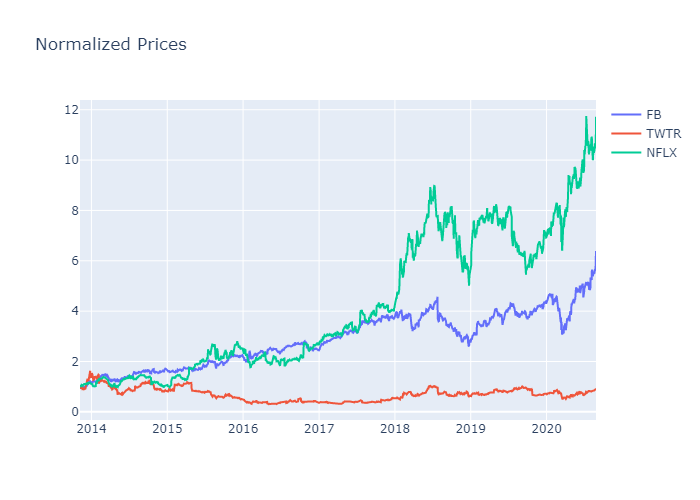

In [25]:
interactive_plot(normalize(stocks_df),'Normalized Prices')

# TASK #3: UNERSTAND THE CONCEPT OF ASSET ALLOCATION

ASSET ALLOCATION:


•	Asset allocation is an investment strategy used to allocate client’s assets based on the risk tolerance, target returns and investments time span.

•	The goal of portfolio manager is to maximize returns and reduce risks.

•	In this project we will focus on portfolio analysis and we will not perform portfolio optimization.

•	Let’s assume we have $1M to invest, we will start with random weights for all the three securities in our data set.



# TASK #4: PERFORM RANDOM ASSET ALLOCATION AND CALCULATE PORTFOLIO DAILY RETURN

In [26]:
# Let's create random portfolio weights
# Portfolio weights must sum to 1 

# Set random seed
np.random.seed(101)

# Create random weights for the stocks and normalize them
weights = np.array(np.random.random(3))
weights
# Ensure that the sum of all weights are = 1
weights = weights/ np.sum(weights)
weights



array([0.46291341, 0.51156154, 0.02552505])

In [27]:
stocks_df

,Date,FB,TWTR,NFLX
0,2013-11-07,47.560001,44.900002,46.694286
1,2013-11-08,47.529999,41.650002,47.842857
2,2013-11-11,46.200001,42.900002,48.272858
3,2013-11-12,46.610001,41.900002,47.675713
4,2013-11-13,48.709999,42.599998,47.897144
...,...,...,...,...
1707,2020-08-20,269.010010,38.959999,497.899994
1708,2020-08-21,267.010010,39.259998,492.309998
1709,2020-08-24,271.390015,40.490002,488.809998
1710,2020-08-25,280.820007,40.549999,490.579987


In [28]:
# Normalize the stock values 
normstocks = normalize(stocks_df)
normstocks

,Date,FB,TWTR,NFLX
0,2013-11-07,1.000000,1.000000,1.000000
1,2013-11-08,0.999369,0.927617,1.024598
2,2013-11-11,0.971405,0.955457,1.033807
3,2013-11-12,0.980025,0.933185,1.021018
4,2013-11-13,1.024180,0.948775,1.025760
...,...,...,...,...
1707,2020-08-20,5.656224,0.867706,10.662975
1708,2020-08-21,5.614172,0.874387,10.543260
1709,2020-08-24,5.706266,0.901782,10.468304
1710,2020-08-25,5.904542,0.903118,10.506210


In [29]:
normstocks.columns[1:]

Index(['FB', 'TWTR', 'NFLX'], dtype='object')

In [30]:
# Note that enumerate returns the value and a counter as well
for counter, stock in enumerate(normstocks.columns[1:]):
  normstocks[stock] = normstocks[stock] * weights[counter]
  normstocks[stock] = normstocks[stock] * 1000000
normstocks.round(decimals = 0)

,Date,FB,TWTR,NFLX
0,2013-11-07,462913.0,511562.0,25525.0
1,2013-11-08,462621.0,474533.0,26153.0
2,2013-11-11,449676.0,488775.0,26388.0
3,2013-11-12,453667.0,477381.0,26062.0
4,2013-11-13,474107.0,485357.0,26183.0
...,...,...,...,...
1707,2020-08-20,2618342.0,443885.0,272173.0
1708,2020-08-21,2598875.0,447303.0,269117.0
1709,2020-08-24,2641507.0,461317.0,267204.0
1710,2020-08-25,2733292.0,462000.0,268172.0


In [31]:
# Let's create an additional column that contains the sum of all $ values in the portfolio
normstocks['portfolio daily worth in $'] = normstocks[normstocks != 'Date'].sum(axis = 1)
normstocks

,Date,FB,TWTR,NFLX,portfolio daily worth in $
0,2013-11-07,4.629134e+05,511561.540818,25525.050846,1.000000e+06
1,2013-11-08,4.626214e+05,474533.145861,26152.907821,9.633074e+05
2,2013-11-11,4.496762e+05,488774.836229,26387.964363,9.648390e+05
3,2013-11-12,4.536668e+05,477381.483934,26061.539916,9.571098e+05
4,2013-11-13,4.741066e+05,485356.784967,26182.583367,9.856460e+05
...,...,...,...,...,...
1707,2020-08-20,2.618342e+06,443884.994008,272172.973431,3.334400e+06
1708,2020-08-21,2.598875e+06,447302.988303,269117.247681,3.315296e+06
1709,2020-08-24,2.641507e+06,461316.857199,267204.001209,3.370028e+06
1710,2020-08-25,2.733292e+06,462000.424156,268171.551269,3.463463e+06


In [32]:
# Let's calculate the portfolio daily return 
# Define a new column in the dataframe and set it to zeros
normstocks['portfolio daily % return'] = 0.0000

for i in range(1, len(stocks_df)):
  # Calculate the percentage of change from the previous day
  normstocks['portfolio daily % return'][i] = ( (normstocks['portfolio daily worth in $'][i] - normstocks['portfolio daily worth in $'][i-1]) / normstocks['portfolio daily worth in $'][i-1]) * 100 

normstocks.round(decimals = 0)

,Date,FB,TWTR,NFLX,portfolio daily worth in $,portfolio daily % return
0,2013-11-07,462913.0,511562.0,25525.0,1000000.0,0.0
1,2013-11-08,462621.0,474533.0,26153.0,963307.0,-4.0
2,2013-11-11,449676.0,488775.0,26388.0,964839.0,0.0
3,2013-11-12,453667.0,477381.0,26062.0,957110.0,-1.0
4,2013-11-13,474107.0,485357.0,26183.0,985646.0,3.0
...,...,...,...,...,...,...
1707,2020-08-20,2618342.0,443885.0,272173.0,3334400.0,2.0
1708,2020-08-21,2598875.0,447303.0,269117.0,3315296.0,-1.0
1709,2020-08-24,2641507.0,461317.0,267204.0,3370028.0,2.0
1710,2020-08-25,2733292.0,462000.0,268172.0,3463463.0,3.0


# TASK #5: PORTFOLIO ALLOCATION - DAILY RETURN/WORTH CALCULATION (FUNCTION)

In [33]:
# Lets assume we have $1,000,000 to be invested and we will allocate this fund based on the weights of the stocks
# We will create a function that takes in the stock prices along with the weights and retun:
# (1) Daily value of each individual securuty in $ over the specified time period
# (2) Overall daily worth of the entire portfolio 
# (3) Daily return 

def portfolio_allocation(df, weights):

  normstocks = df.copy()
  
  # Normalize the stock avalues 
  normstocks = normalize(normstocks)
  
  for counter, stock in enumerate(normstocks.columns[1:]):
    normstocks[stock] = normstocks[stock] * weights[counter]
    normstocks[stock] = normstocks[stock] * 1000000

  normstocks['portfolio daily worth in $'] = normstocks[normstocks != 'Date'].sum(axis = 1)
  
  normstocks['portfolio daily % return'] = 0.0000

  for i in range(1, len(stocks_df)):
    
    # Calculate the percentage of change from the previous day
    normstocks['portfolio daily % return'][i] = ( (normstocks['portfolio daily worth in $'][i] - normstocks['portfolio daily worth in $'][i-1]) / normstocks['portfolio daily worth in $'][i-1]) * 100 
  
  # set the value of first row to zero, as previous value is not available
  normstocks['portfolio daily % return'][0] = 0
  return normstocks

In [34]:
# Call the function
normstocks = portfolio_allocation(stocks_df, weights)
normstocks

,Date,FB,TWTR,NFLX,portfolio daily worth in $,portfolio daily % return
0,2013-11-07,4.629134e+05,511561.540818,25525.050846,1.000000e+06,0.000000
1,2013-11-08,4.626214e+05,474533.145861,26152.907821,9.633074e+05,-3.669255
2,2013-11-11,4.496762e+05,488774.836229,26387.964363,9.648390e+05,0.158988
3,2013-11-12,4.536668e+05,477381.483934,26061.539916,9.571098e+05,-0.801081
4,2013-11-13,4.741066e+05,485356.784967,26182.583367,9.856460e+05,2.981492
...,...,...,...,...,...,...
1707,2020-08-20,2.618342e+06,443884.994008,272172.973431,3.334400e+06,2.162927
1708,2020-08-21,2.598875e+06,447302.988303,269117.247681,3.315296e+06,-0.572944
1709,2020-08-24,2.641507e+06,461316.857199,267204.001209,3.370028e+06,1.650903
1710,2020-08-25,2.733292e+06,462000.424156,268171.551269,3.463463e+06,2.772547


# TASK #6: PERORM PORTFOLIO DATA VISUALIZATION

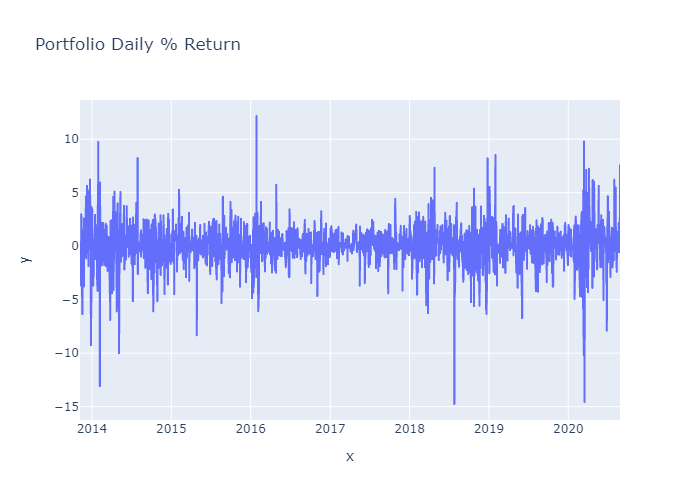

In [35]:
# Plot the portfolio daily return
fig = px.line(x = normstocks.Date, y = normstocks['portfolio daily % return'], title = 'Portfolio Daily % Return')
fig.show('png')

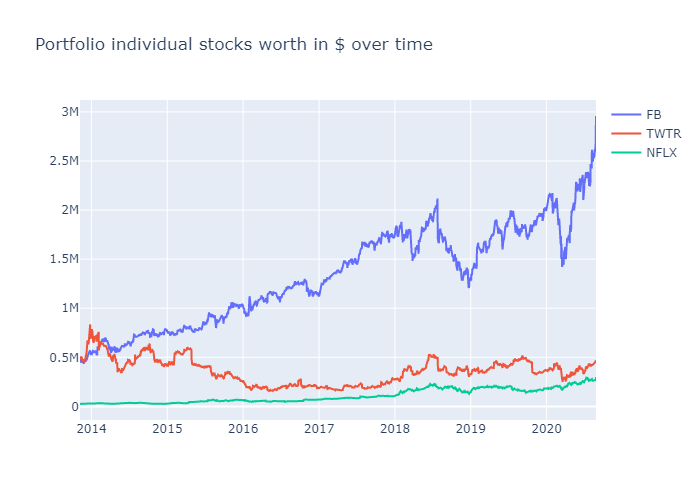

In [36]:
# Plot all stocks (normalized)
interactive_plot(normstocks.drop(['portfolio daily worth in $', 'portfolio daily % return'], axis = 1), 'Portfolio individual stocks worth in $ over time')

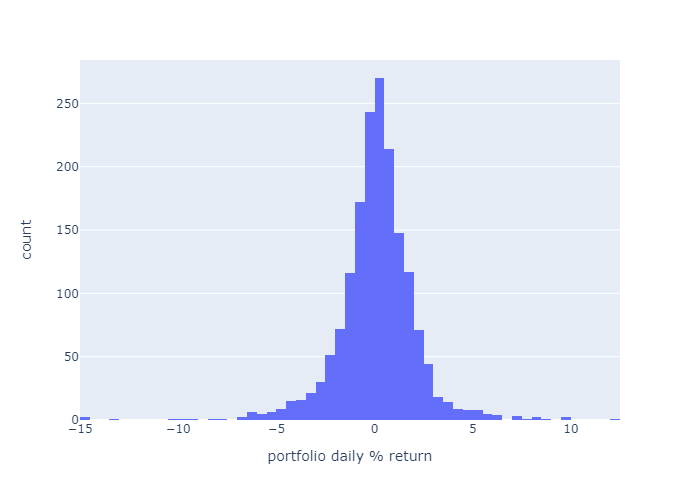

In [26]:
# Print out a histogram of daily returns
fig = px.histogram(normstocks, x = 'portfolio daily % return')
fig.show('png')

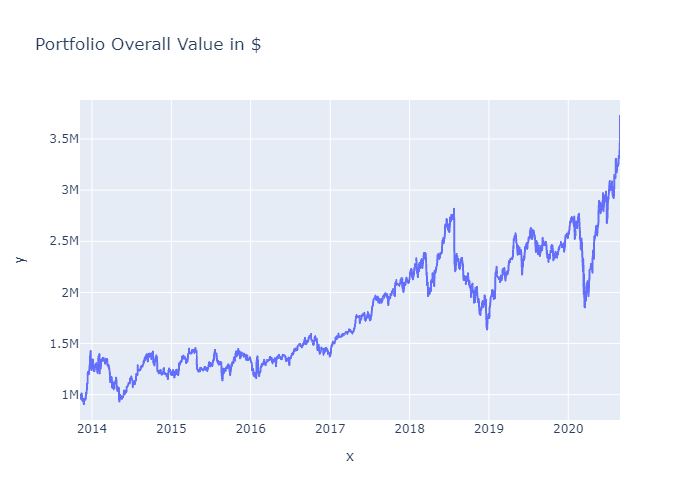

In [27]:
fig = px.line(x = normstocks.Date, y = normstocks['portfolio daily worth in $'], title= 'Portfolio Overall Value in $')
fig.show('png')

# TASK #7: CALCULATE PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

In [20]:
normstocks

,Date,FB,TWTR,NFLX,portfolio daily worth in $,portfolio daily % return
0,2013-11-07,4.629134e+05,511561.540818,25525.050846,1.000000e+06,0.000000
1,2013-11-08,4.626214e+05,474533.145861,26152.907821,9.633074e+05,-3.669255
2,2013-11-11,4.496762e+05,488774.836229,26387.964363,9.648390e+05,0.158988
3,2013-11-12,4.536668e+05,477381.483934,26061.539916,9.571098e+05,-0.801081
4,2013-11-13,4.741066e+05,485356.784967,26182.583367,9.856460e+05,2.981492
...,...,...,...,...,...,...
1707,2020-08-20,2.618342e+06,443884.994008,272172.973431,3.334400e+06,2.162927
1708,2020-08-21,2.598875e+06,447302.988303,269117.247681,3.315296e+06,-0.572944
1709,2020-08-24,2.641507e+06,461316.857199,267204.001209,3.370028e+06,1.650903
1710,2020-08-25,2.733292e+06,462000.424156,268171.551269,3.463463e+06,2.772547


In [21]:
# Cummulative return of the portfolio (Note that we now look for the last net worth of the portfolio compared to it's start value)
cummulative_return = ((normstocks['portfolio daily worth in $'][-1:] - normstocks['portfolio daily worth in $'][0])/ normstocks['portfolio daily worth in $'][0]) * 100
print('Cummulative return of the portfolio is {} %'.format(cummulative_return.values[0]))


Cummulative return of the portfolio is 272.5373991797118 %


In [22]:
# Calculate the portfolio standard deviation
print('Standard deviation of the portfolio is {}'.format(normstocks['portfolio daily % return'].std()))

Standard deviation of the portfolio is 2.0244163418607495


In [23]:
# Calculate the average daily return 
print('Average daily return of the portfolio is {} %'.format(normstocks['portfolio daily % return'].mean() ))

Average daily return of the portfolio is 0.09751590070507767 %


In [24]:
# Portfolio sharpe ratio
sharpe_ratio = normstocks['portfolio daily % return'].mean() / normstocks['portfolio daily % return'].std() * np.sqrt(252)
print('Sharpe ratio of the portfolio is {}'.format(sharpe_ratio))

Sharpe ratio of the portfolio is 0.7646732052250461
